In [1]:
import pandas as pd
from ggplot import *
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np

C:\Users\scena\AppData\Local\conda\conda\envs\keras\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\scena\AppData\Local\conda\conda\envs\keras\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\scena\AppData\Local\conda\conda\envs\keras\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#df = pd.read_csv('ASF83-1-dense.csv', header=None)
df = pd.read_csv('yskm03-dense.csv', header=None)

In [3]:
data = df[[i for i in range(10, 264)]]
filter_nan = np.isfinite(data[10]) 
data = data[filter_nan]

In [4]:
score_columns = [3, 4, 5, 6, 7, 8, 9] 
label = df[score_columns]
label = label[filter_nan]
label['mean_score'] = label.mean(axis=1)

# 
label['NG_position'] = 0
for row in label.index:
    m = 0
    i = 0
    for column in score_columns:
        if float(label[column][row]) > m:
            m = float(label[column][row])
            i = column
    if m > 100:
        label['NG_position'][row] = i-2
        

C:\Users\scena\AppData\Local\conda\conda\envs\keras\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [15]:
tsne = TSNE(n_components=2, verbose=1, perplexity=600, n_iter=10000)
tsne_results = tsne.fit_transform(data.values)
pca = PCA(n_components=2)
pca_results = pca.fit_transform(data.values)

[t-SNE] Computing 646 nearest neighbors...
[t-SNE] Indexed 647 samples in 0.001s...
[t-SNE] Computed neighbors for 647 samples in 0.053s...
[t-SNE] Computed conditional probabilities for sample 647 / 647
[t-SNE] Mean sigma: 18.097702
[t-SNE] KL divergence after 250 iterations with early exaggeration: 31.516943
[t-SNE] Error after 1050 iterations: 0.021327


In [16]:
df_tsne = pd.DataFrame()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
df_tsne['label'] = label['NG_position']

df_pca = pd.DataFrame()
df_pca['x-pca'] = pca_results[:,0]
df_pca['y-pca'] = pca_results[:,1]
df_pca['label'] = label['NG_position']

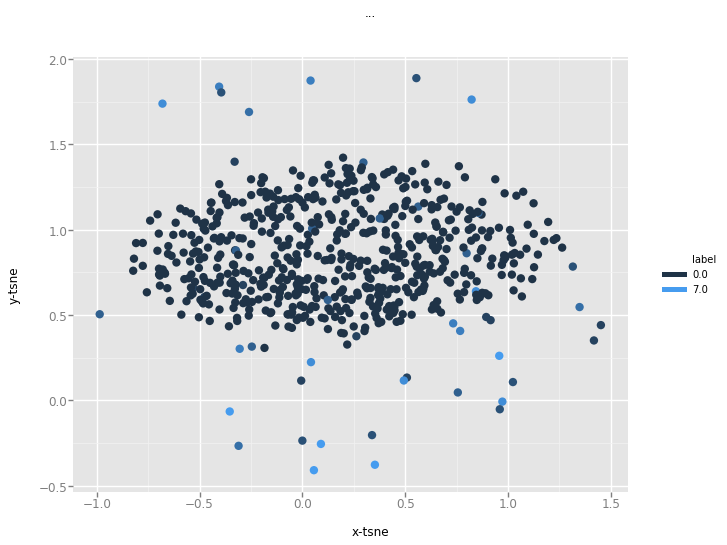

<ggplot: (-9223371886808340564)>

In [17]:
ggplot(df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=1.0) \
        + ggtitle("...")

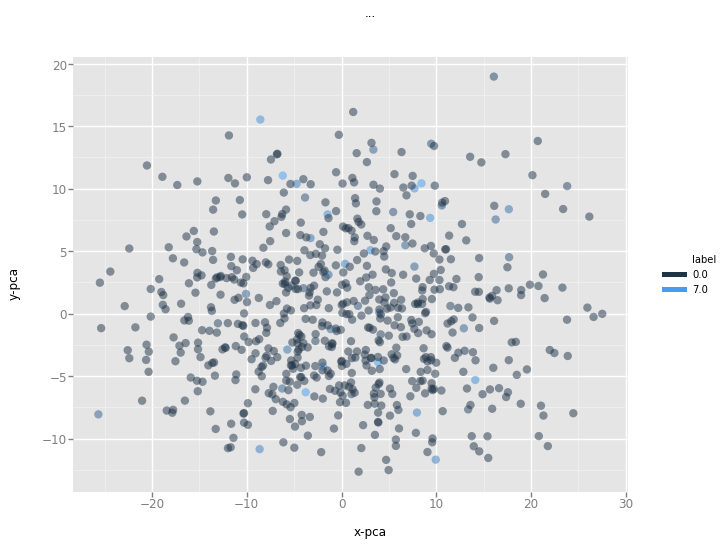

<ggplot: (-9223371886812855762)>

In [8]:
ggplot(df_pca, aes(x='x-pca', y='y-pca', color='label') ) \
        + geom_point(size=70,alpha=0.5) \
        + ggtitle("...")